<a href="https://colab.research.google.com/github/vaasanthk/Machine-Learning/blob/master/k_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
%xmode verbose

Exception reporting mode: Verbose


***K-MEANS***

The way kmeans algorithm works is as follows:

* Specify number of clusters K.
* Initialize centroids by first shuffling the dataset and then randomly       
* selecting K data points for the centroids without replacement.   

*  Keep iterating until there is no change to the centroids. i.e assignment of
   data points to clusters isn’t changing.
*  Compute the sum of the squared distance between data points and all centroids.
*  Assign each data point to the closest cluster (centroid).
*  Compute the centroids for the clusters by taking the average of the all data points that belong to each cluster.



Math behind the alogrithm

![alt text](https://miro.medium.com/max/658/1*dJfCcZJWXIRnhr7IYtB7nQ.png)

In [0]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns, numpy as np
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cmx
sns.set_context('notebook')
plt.style.use('fivethirtyeight')
from warnings import filterwarnings
filterwarnings('ignore')


In [8]:
data = pd.read_csv('/content/ruspini.csv')
data.head()

,x,y
0,4,53
1,5,63
2,10,59
3,9,77
4,13,49


In [9]:
data.describe()

,x,y
count,75.00000,75.000000
mean,54.88000,92.026667
std,30.50253,48.702620
min,4.00000,4.000000
25%,31.50000,56.500000
50%,52.00000,96.000000
75%,76.50000,141.500000
max,117.00000,156.000000


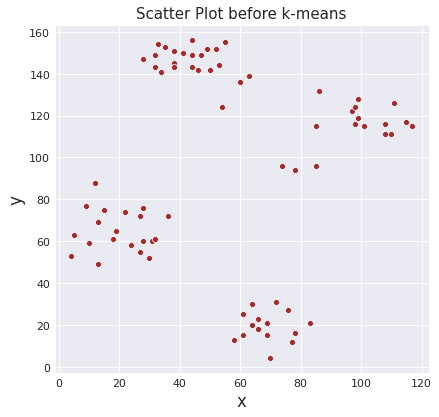

In [12]:
plt.figure(figsize=(6, 6))
sns.set_style("darkgrid")
sns.scatterplot(data.iloc[:, 0], y= data.iloc[:,1], palette = "magma", sizes = 200, color = 'brown');
plt.title("Scatter Plot before k-means", fontsize = 15)
plt.show()

## Evaluation Methods



*   Elbow method
*   Silhouette analysis



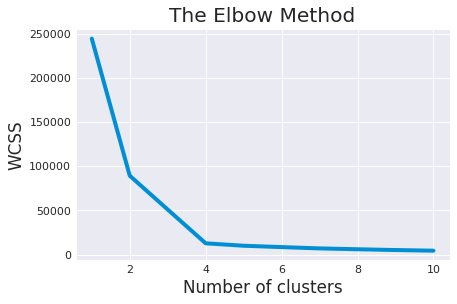

In [32]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


From the above graph we can determine that number of cluster is 4 because the elbow shape occurs at 4. 

In [36]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++')
y_kmeans = kmeans.fit_predict(data)

y_kmeans

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3], dtype=int32)

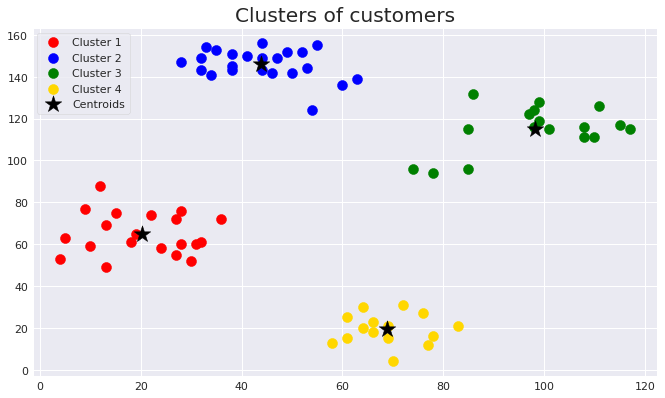

In [52]:
# Visualising the clusters
plt.figure(figsize=(10, 6))
plt.scatter(data.iloc[y_kmeans == 0, 0], data.iloc[y_kmeans == 0,1], s =100, c = 'red', label = 'Cluster 1')
plt.scatter(data.iloc[y_kmeans == 1, 0], data.iloc[y_kmeans == 1,1], s =100, c = 'blue', label = 'Cluster 2')
plt.scatter(data.iloc[y_kmeans == 2, 0], data.iloc[y_kmeans == 2,1], s =100, c = 'green', label = 'Cluster 3')
plt.scatter(data.iloc[y_kmeans == 3, 0], data.iloc[y_kmeans == 3,1], s =100, c = 'gold', label = 'Cluster 4')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'k', label = 'Centroids', marker='*')
plt.title('Clusters of customers')
plt.legend()
plt.show()

The above graph shows the scatter plot of the data colored by the cluster they belong to. In this example, we chose K=4. The symbol ‘*‘ is the centroid of each cluster. We can think of those 4 clusters had different kinds of behaviors under different scenarios.

Silhouette analysis can be used to determine the degree of separation between clusters. 

For each sample:

* Compute the average distance from all data points in the same cluster (ai).
* Compute the average distance from all data points in the closest cluster (bi).
* Compute the coefficient:

![alt text](https://miro.medium.com/max/274/1*SAdv13fu4zgWRwRvGBrIWQ.png)

The coefficient can take values in the interval [-1, 1].

* If it is 0 –> the sample is very close to the neighboring clusters.
* It it is 1 –> the sample is far away from the neighboring clusters.
* It it is -1 –> the sample is assigned to the wrong clusters.


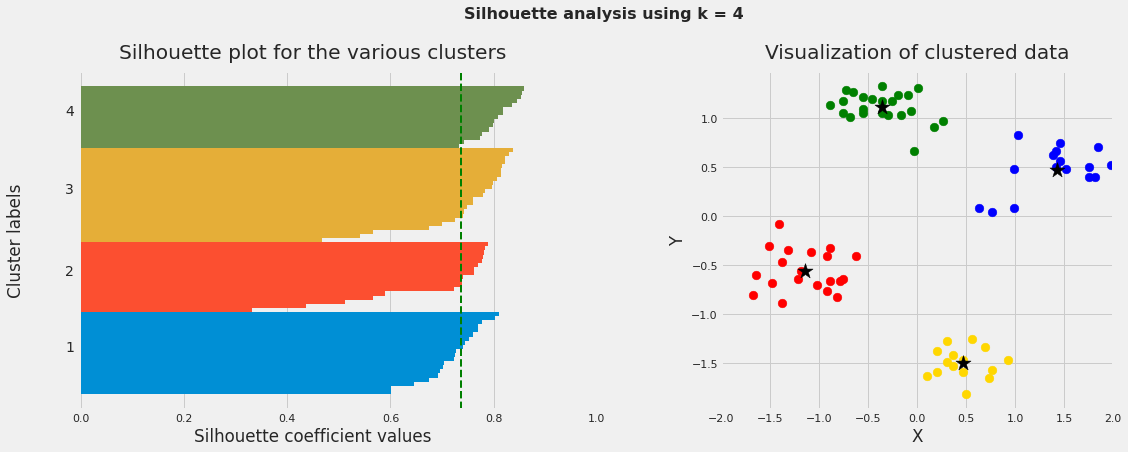

In [148]:
for i, k in enumerate([4]):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(17, 6)
    
    # Run the Kmeans algorithm
    km = KMeans(n_clusters=k)
    labels = km.fit_predict(X_std)
    centroids = km.cluster_centers_

    # Get silhouette samples
    silhouette_vals = silhouette_samples(X_std, labels)

    # Silhouette plot
    y_ticks = []
    y_lower, y_upper = 0, 0
    for i, cluster in enumerate(np.unique(labels)):
        cluster_silhouette_vals = silhouette_vals[labels == cluster]
        cluster_silhouette_vals.sort()
        y_upper += len(cluster_silhouette_vals)
        ax1.barh(range(y_lower, y_upper), cluster_silhouette_vals, edgecolor='None', height=1)
        ax1.text(-0.03, (y_lower + y_upper) / 2, str(i + 1))
        y_lower += len(cluster_silhouette_vals)

    # Get the average silhouette score and plot it
    avg_score = np.mean(silhouette_vals)
    ax1.axvline(avg_score, linestyle='--', linewidth=2, color='green')
    ax1.set_yticks([])
    ax1.set_xlim([-0.1, 1])
    ax1.set_xlabel('Silhouette coefficient values')
    ax1.set_ylabel('Cluster labels')
    ax1.set_title('Silhouette plot for the various clusters', y=1.02);
    
    # Scatter plot of data colored with labels
    # ax2.scatter(X_std[:, 0], X_std[:, 1], c=labels)
    ax2.scatter(X_std[labels == 0, 0], X_std[labels == 0,1], s =75, c = 'red', label = 'Cluster 1')
    ax2.scatter(X_std[labels == 1, 0], X_std[labels == 1,1], s =75, c = 'blue', label = 'Cluster 2')
    ax2.scatter(X_std[labels == 2, 0], X_std[labels == 2,1], s =75, c = 'green', label = 'Cluster 3')
    ax2.scatter(X_std[labels == 3, 0], X_std[labels == 3,1], s =75, c = 'gold', label = 'Cluster 4')
    ax2.scatter(centroids[:, 0], centroids[:, 1], marker='*', c='k', s=250)
    ax2.set_xlim([-2, 2])
    ax2.set_xlim([-2, 2])
    ax2.set_xlabel('X') 
    ax2.set_ylabel('Y')
    ax2.set_title('Visualization of clustered data', y=1.02)
    ax2.set_aspect('equal')
    plt.tight_layout()
    plt.suptitle(f'Silhouette analysis using k = {k}',
                 fontsize=16, fontweight='semibold', y=1.05);

As the above plots show, n_clusters=4 has the best average silhouette score of around 0.75 and all clusters being above the average shows that it is actually a good choice. Also, the thickness of the silhouette plot gives an indication of how big each cluster is.

## Conclusion

Below are the main takeaways:

* Scale/standardize the data when applying kmeans algorithm.

* Elbow method in selecting number of clusters doesn’t usually work because the error function is monotonically decreasing for all ks.

* Kmeans gives more weight to the bigger clusters.

* Kmeans assumes spherical shapes of clusters (with radius equal to the distance between the centroid and the furthest data point) and doesn’t work well when clusters are in different shapes such as elliptical clusters.

* If there is overlapping between clusters, kmeans doesn’t have an intrinsic measure for uncertainty for the examples belong to the overlapping region in order to determine for which cluster to assign each data point.

* Kmeans may still cluster the data even if it can’t be clustered such as data that comes from uniform distributions.